### Лабораторная работа №5 (вариант 11)

In [1]:
import math
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

# Решение СЛАУ методом Монте-Карло

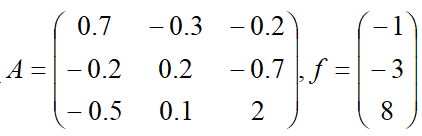

In [2]:
# матрица A преобразована так, чтобы представить систему в виде x = Ax + f 

A = [[0.1, 0.5, 0.05], 
     [-0.05, 0.85, 0.05], 
     [0.0, 0.0, -0.1]]

#A = [[0.3, 0.3, 0.2], 
#     [0.2, 0.8, 0.7], 
#     [0.5, -0.1, -1.0]]

f = [0.0, -1.0, 4.0]

pi = [1/3, 1/3, 1/3]

p = [[1/3, 1/3, 1/3], 
     [1/3, 1/3, 1/3], 
     [1/3, 1/3, 1/3]]

#### Собственные числа матрицы A по модулю меньше единицы, значит можно применять метод Монте-Карло

In [3]:
def avg(values):
    total = 0
    for val in values:
        total += val
    return total / len(values)

In [4]:
def rmsd(x1, x2):
    total = 0
    for i in range(len(x1)):
        total += (x1[i] - x2[i])**2
    return np.sqrt(total)

In [5]:
def plot_diff(diff, n_list):
    X, Y = np.array(n_list), np.array(diff)
    
    fig = plt.figure(figsize = [18, 8])

    plt.plot(X, Y, 'go')
    plt.plot(X, Y, 'g-')
    plt.show()

In [6]:
def generate_chain(N):
    chain = [0 for k in range(N)]
    
    x = np.random.rand()
    total = 0
    for i in range(len(pi)):
        total += pi[i]
        if(x < total):
            chain[0] = i
            break
    
    for k in range(1, N):
        x = np.random.rand()
        #print("x[" + str(k) + "] = " + str(x))
        total = 0
        for i in range(len(pi)):
            total += p[chain[k-1]][i]
            if(x < total):
                chain[k] = i
                break
                
    return chain

In [7]:
def solve(M, N):
    H = [[1, 0, 0], 
         [0, 1, 0], 
         [0, 0, 1]]
    
    ans = []
    
    for h in H:
        ksi = [0 for m in range(M)]
        for m in range(M):
            
            #generate Markov's chain
            i = generate_chain(N)
            
            # calculate weight for generated chain
            q = [0 for k in range(N)]
            if(pi[i[0]] == 0):
                q[0] = 0
            else:
                q[0] = h[i[0]] / pi[i[0]]
                
            for k in range(1, N):
                if(p[i[k-1]][i[k]] == 0):
                    q[k] = 0
                else:
                    q[k] = q[k-1] * A[i[k-1]][i[k]] / p[i[k-1]][i[k]]
            
            # calculate value of random variable
            for k in range(N):
                ksi[m] += q[k]*f[i[k]]
            
        # calculate expectation of generated random variable
        ans.append(avg(ksi))
    
    return ans

In [8]:
def smooth(a):
    b = a.copy()
    for i in range(2, len(b) - 2):
        a[i] = (b[i-2] + 2*b[i-1] + 3*b[i] + 2*b[i+1] + b[i+2]) / 9
        
    a[0] = (3*b[0] + 2*b[1] + b[2]) / 6
    a[len(a) - 1] = (3*b[len(b) - 1] + 2*b[len(b) - 2] + b[len(b) - 3]) / 6
    
    a[1] = (2*b[1] + b[0] + b[2]) / 4
    a[len(a) - 2] = (2*b[len(b) - 2] + b[len(b) - 1] + b[len(b) - 3]) / 4
    
    return(a)

In [9]:
ans_exact = [-105/44, -205/44, 40/11]

print("Точное решение: " + str(ans_exact))
print("Решение методом Монте-Карло: " + str(solve(50000, 10)))
print("\n")

Точное решение: [-2.3863636363636362, -4.659090909090909, 3.6363636363636362]
Решение методом Монте-Карло: [-1.8903693868084168, -4.2494436066375405, 3.6305705196261964]




## Зависимость точности от числа сгенерированных цепей Маркова

In [10]:
diff1 = []
m_list = []

N = 10
for M in range(1000, 50000, 1000):
    m_list.append(M)
    
for M in m_list:
    ans = solve(M, 10)
    diff1.append(rmsd(ans, ans_exact))

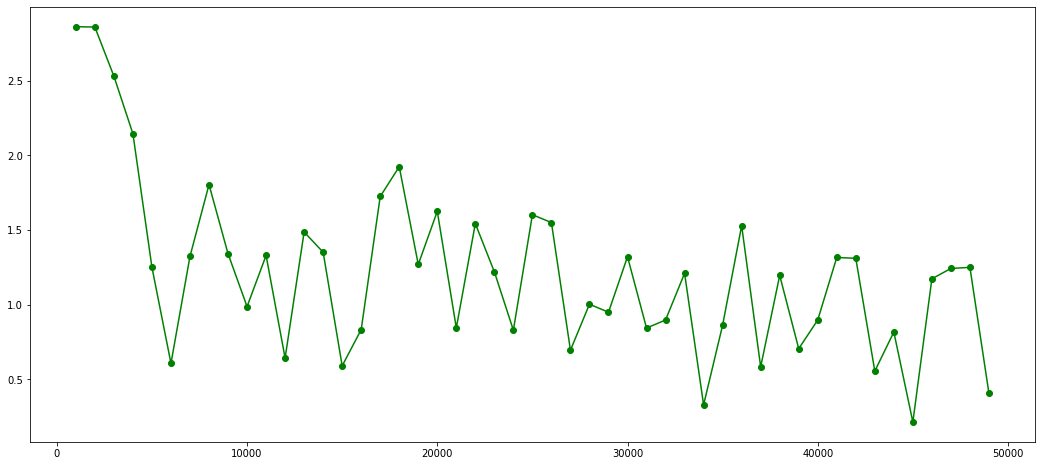

In [11]:
plot_diff(diff1, m_list)

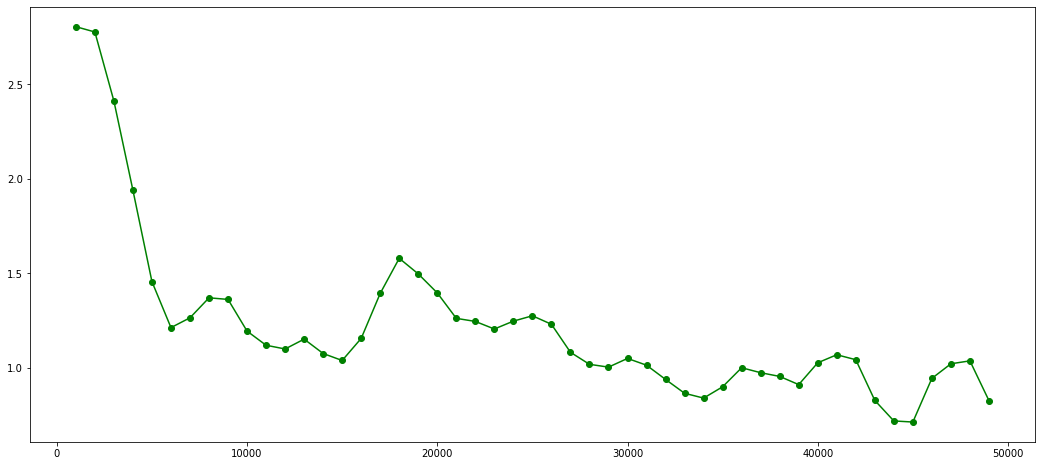

In [12]:
plot_diff(smooth(diff1), m_list)

# Рассмотрим другую СЛАУ

In [13]:
A = [[0.0, 0.4, 0.1], 
     [-0.4, 0.3, 0.1], 
     [-0.3, -0.2, 0.0]]

f = [-1, 5, -4]

## Зависимость точности от числа сгенерированных цепей Маркова

In [14]:
ans_exact = [148/181, 1068/181, -982/181]

print("Точное решение: " + str(ans_exact))
print("Решение методом Монте-Карло: " + str(solve(50000, 10)))
print("\n")

Точное решение: [0.8176795580110497, 5.900552486187845, -5.425414364640884]
Решение методом Монте-Карло: [0.8017178287374299, 5.991264752037014, -5.426718226091292]




In [18]:
diff2 = []
m_list = []

N = 10
for M in range(5000, 50000, 1000):
    m_list.append(M)
    
for M in m_list:
    ans = solve(M, 10)
    diff2.append(rmsd(ans, ans_exact))

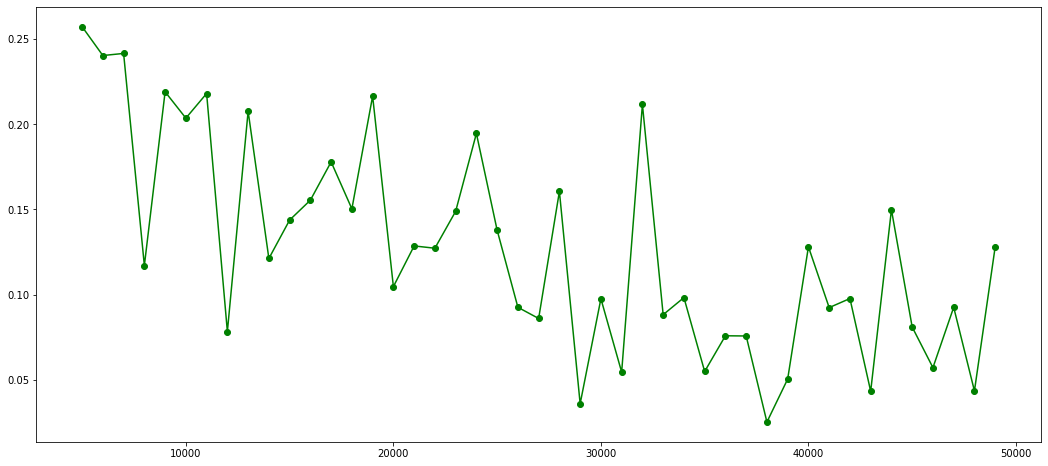

In [22]:
plot_diff(diff2, m_list)

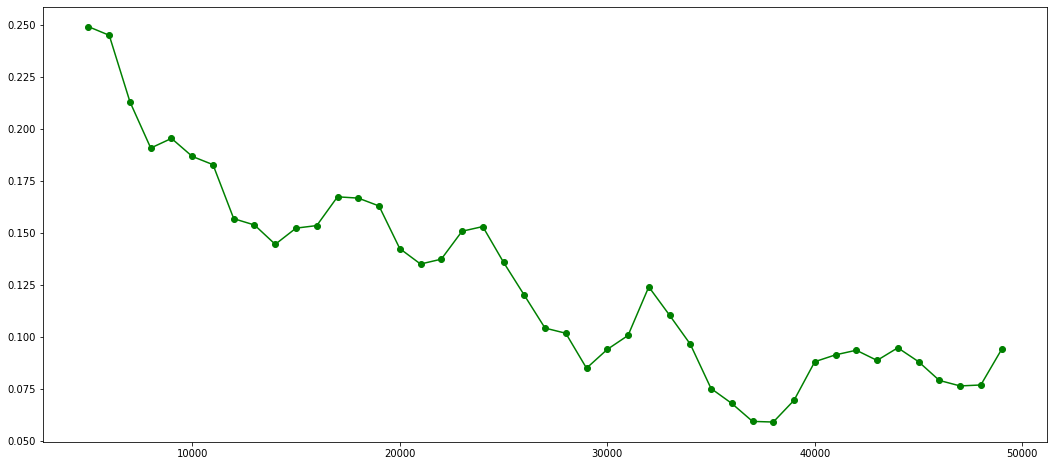

In [24]:
plot_diff(smooth(diff2), m_list)

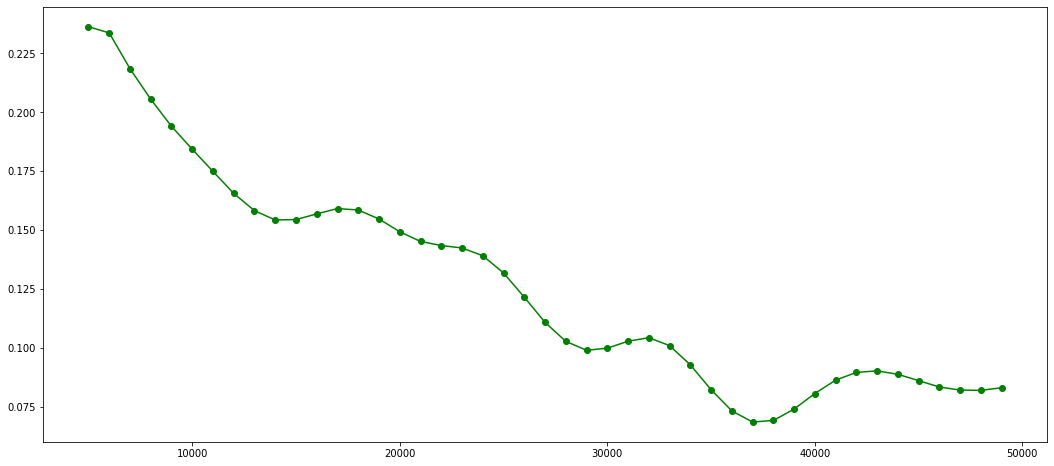

In [43]:
plot_diff(smooth(diff2), m_list)

## Зависимость точности от длины сгенерированных цепей Маркова

In [27]:
diff3 = []
n_list = []

M = 10000
for N in range(100, 1000, 50):
    n_list.append(N)
    
for N in n_list:
    ans = solve(10000, N)
    diff3.append(rmsd(ans, ans_exact))

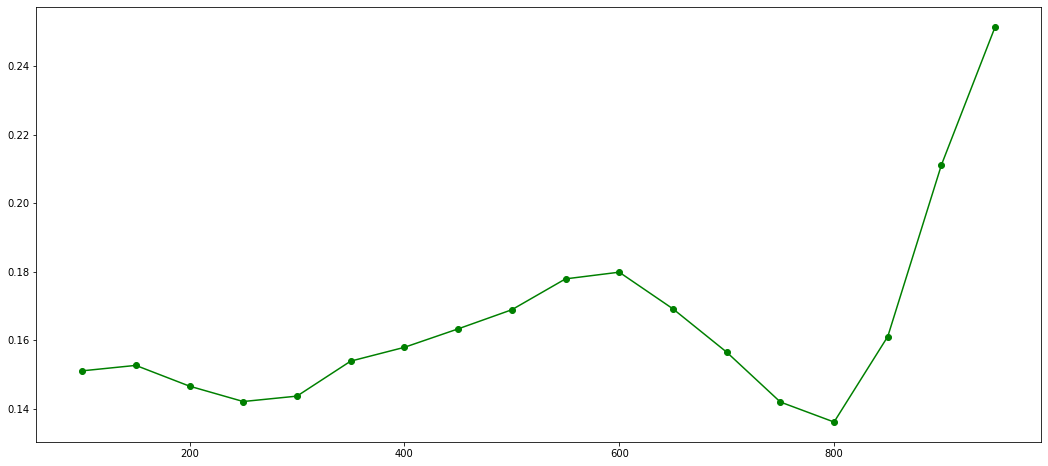

In [35]:
plot_diff(diff3, n_list)

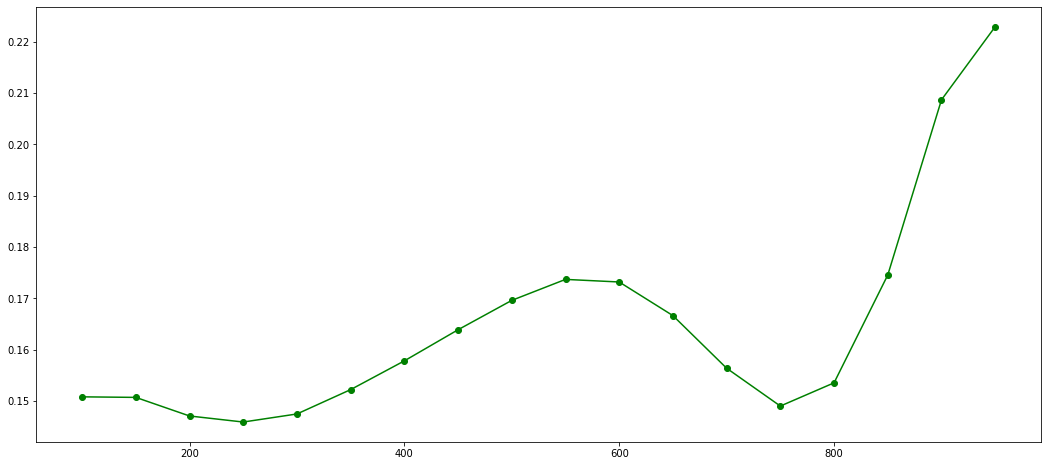

In [36]:
plot_diff(smooth(diff3), n_list)

In [38]:
diff4 = []
n_list2 = []

M = 10000
for N in range(5, 85, 5):
    n_list2.append(N)
    
for N in n_list2:
    ans = solve(10000, N)
    diff4.append(rmsd(ans, ans_exact))

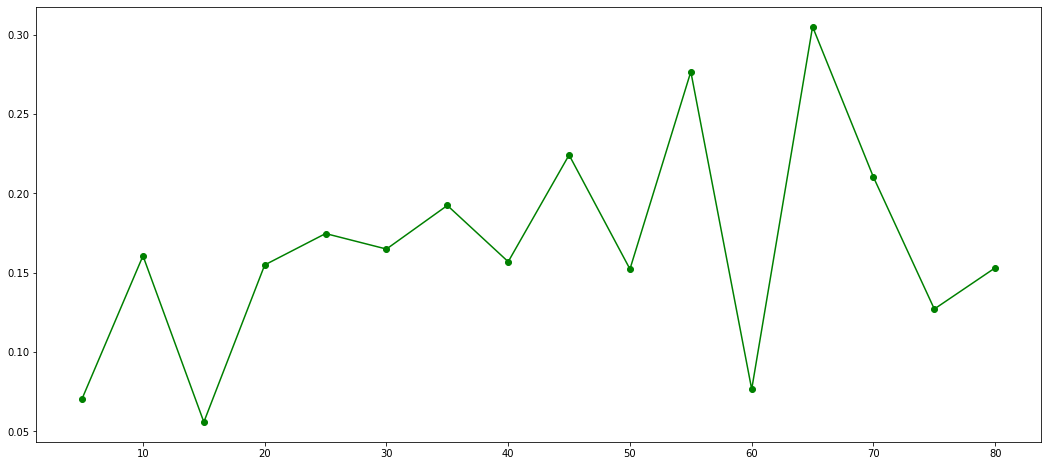

In [39]:
plot_diff(diff4, n_list2)

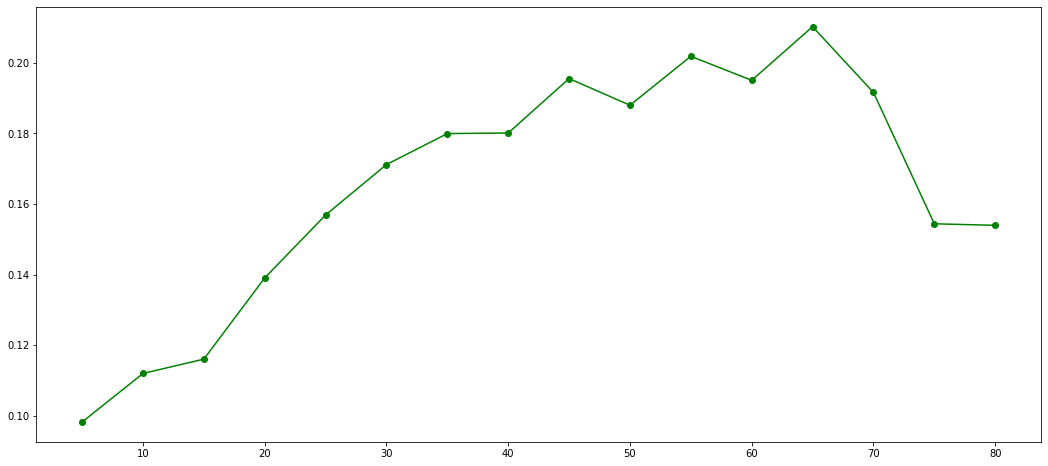

In [40]:
plot_diff(smooth(diff4), n_list2)